## Model Selection using RFE (Housing Case Study)

### Importing and Understanding Data

In [1]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

# This library will be required for label encodings for car company name
from sklearn.preprocessing import LabelEncoder

# This will be used to get the dictionary mapping for the car company encodings done using LabelEncoder
from sklearn import preprocessing

# This library will be required to split the data set into train and test sets respectively.
from sklearn.model_selection import train_test_split

# This will be required to scale the data.
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


# Importing STATS MODEL
import statsmodels.api as sm

# Import VIF module
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [3]:
pd.options.display.max_columns = None

# To display all the rows
pd.options.display.max_rows = None

# To map Empty Strings or numpy.inf as Na Values
pd.options.mode.use_inf_as_na = True

# Set Precision to 8 for better readability
pd.set_option('precision', 8)
pd.options.display.float_format = '{:.4f}'.format

pd.options.display.expand_frame_repr =  False

%matplotlib inline

# Set Style
sns.set(style = "whitegrid")

# Ignore Warnings
warnings.filterwarnings('ignore')

In [4]:
def plotHeatMap(data):
    plt.figure(figsize = (20, 26))
    plt.subplot(2, 1, 1)
    sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
    plt.show()

In [5]:
# Importing Housing.csv
bikes_df = pd.read_csv('day.csv')

In [6]:
# Looking at the first five rows
bikes_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  weathersit    temp   atemp     hum  windspeed  casual  registered   cnt
0        1  01-01-2018       1   0     1        0        6           0           2 14.1108 18.1812 80.5833    10.7499     331         654   985
1        2  02-01-2018       1   0     1        0        0           0           2 14.9026 17.6869 69.6087    16.6521     131         670   801
2        3  03-01-2018       1   0     1        0        1           1           1  8.0509  9.4703 43.7273    16.6367     120        1229  1349
3        4  04-01-2018       1   0     1        0        2           1           1  8.2000 10.6061 59.0435    10.7398     108        1454  1562
4        5  05-01-2018       1   0     1        0        3           1           1  9.3052 11.4635 43.6957    12.5223      82        1518  1600

In [7]:
bikes_df.shape

(730, 16)

### Drop the Variable

#### From these variables we can already assume that casual and registered variables will not be very useful in the modeling process as these are just number of users and unlikely to be the factor that directly causes rise in the number of bike rentals. Most likely these variables will grow in value along with bike rentals and that change in value is likely to be caused by different factors that we will try to explore.

#### Similarlly variables 'instant' and 'dteday' is also not of any use for the data analysis .

### So we drop these variables

In [8]:
bikes_df.drop(labels = ['instant'], axis = 1, inplace = True)

In [9]:
bikes_df.drop(labels = ['dteday'], axis = 1, inplace = True)

In [10]:
bikes_df.drop(labels = ['casual'], axis = 1, inplace = True)

In [11]:
bikes_df.drop(labels = ['registered'], axis = 1, inplace = True)

In [12]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [13]:
bikes_df.describe()

season       yr     mnth  holiday  weekday  workingday  weathersit     temp    atemp      hum  windspeed       cnt
count 730.0000 730.0000 730.0000 730.0000 730.0000    730.0000    730.0000 730.0000 730.0000 730.0000   730.0000  730.0000
mean    2.4986   0.5000   6.5260   0.0288   2.9973      0.6836      1.3945  20.3193  23.7263  62.7652    12.7636 4508.0068
std     1.1102   0.5003   3.4502   0.1673   2.0062      0.4654      0.5448   7.5067   8.1503  14.2376     5.1958 1936.0116
min     1.0000   0.0000   1.0000   0.0000   0.0000      0.0000      1.0000   2.4243   3.9535   0.0000     1.5002   22.0000
25%     2.0000   0.0000   4.0000   0.0000   1.0000      0.0000      1.0000  13.8119  16.8897  52.0000     9.0417 3169.7500
50%     3.0000   0.5000   7.0000   0.0000   3.0000      1.0000      1.0000  20.4658  24.3682  62.6250    12.1253 4548.5000
75%     3.0000   1.0000  10.0000   0.0000   5.0000      1.0000      2.0000  26.8806  30.4458  72.9896    15.6256 5966.0000
max     4.0000   1.0000  12.0000   1.0000   6.0000      1.0000      3.0000  35.3283  42.0448  97.2500    34.0000 8714.0000

# Data Visualization

## Exploratpry Data Analysis

### Number Summary of the Bike Rental Count 'cnt' Feature

Text(0.5, 0.98, 'Recorded Bike Rental Counts')

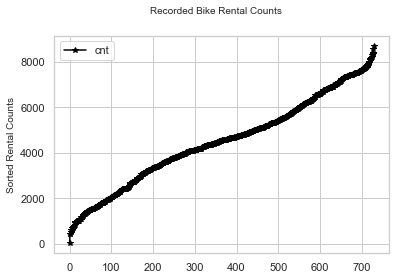

In [14]:
fig, ax = plt.subplots(1)
ax.plot(sorted(bikes_df['cnt']), color = 'black', marker = '*', label='cnt')
ax.legend(loc= 'left')
ax.set_ylabel('Sorted Rental Counts', fontsize = 10)
fig.suptitle('Recorded Bike Rental Counts', fontsize = 10)

##### Sorted counts of the bike rentals reveal that the majority of the rentals happen in the 0 - 4000 ranges, values higher than those are rare or outliers

##  Features vs. Rental Counts
##### lets create scatter plots of all our float data types and compare them against rental counts to visualize potential relationship

#### Plot between 'temp' and 'cnt'

Text(0, 0.5, 'Count of all Biks Rented')

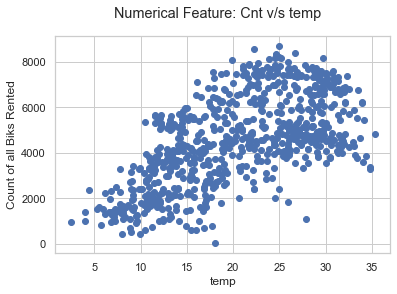

In [15]:
plt.scatter(bikes_df['temp'], bikes_df['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s temp')
plt.xlabel('temp')
plt.ylabel('Count of all Biks Rented')

#### As per the scatter plot we can see their is a liner relation between number of bike rented and temperature the warmmer the temp the more bike get rented

#### Plot between 'atemp' and 'cnt'

Text(0, 0.5, 'Count of all Biks Rented')

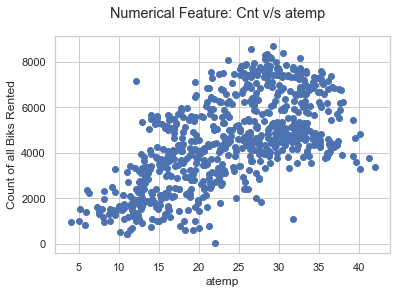

In [16]:
plt.scatter(bikes_df['atemp'], bikes_df['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s atemp')
plt.xlabel('atemp')
plt.ylabel('Count of all Biks Rented')

### We can clearly  see that both the feature 'temp' and 'atemp' have similar distribution and may present redundancy and even multicollinearity. to keep things clean we can drop one of them 

### So i drop 'temp' from the data 


In [17]:
bikes_df.drop(labels = ['temp'], axis = 1, inplace = True)

In [18]:
bikes_df

season  yr  mnth  holiday  weekday  workingday  weathersit   atemp     hum  windspeed   cnt
0         1   0     1        0        6           0           2 18.1812 80.5833    10.7499   985
1         1   0     1        0        0           0           2 17.6869 69.6087    16.6521   801
2         1   0     1        0        1           1           1  9.4703 43.7273    16.6367  1349
3         1   0     1        0        2           1           1 10.6061 59.0435    10.7398  1562
4         1   0     1        0        3           1           1 11.4635 43.6957    12.5223  1600
5         1   0     1        0        4           1           1 11.6605 51.8261     6.0009  1606
6         1   0     1        0        5           1           2 10.4420 49.8696    11.3046  1510
7         1   0     1        0        6           0           2  8.1127 53.5833    17.8759   959
8         1   0     1        0        0           0           1  5.8087 43.4167    24.2507   822
9         1   0     1        0        1           1           1  7.5444 48.2917    14.9589  1321
10        1   0     1        0        2           1           2  9.5732 68.6364     8.1828  1263
11        1   0     1        0        3           1           1  8.0236 59.9545    20.4100  1162
12        1   0     1        0        4           1           1  7.5442 47.0417    20.1670  1406
13        1   0     1        0        5           1           1  9.4207 53.7826     8.4787  1421
14        1   0     1        0        6           0           2 12.4056 49.8750    10.5835  1248
15        1   0     1        0        0           0           1 11.7109 48.3750    12.6250  1204
16        1   0     1        1        1           0           2  8.8385 53.7500    12.9991  1000
17        1   0     1        0        2           1           2 11.6166 86.1667     9.8339   683
18        1   0     1        0        3           1           2 14.9211 74.1739    13.9572  1650
19        1   0     1        0        4           1           2 12.7525 53.8333    13.1256  1927
20        1   0     1        0        5           1           1  7.8917 45.7083    23.6672  1543
21        1   0     1        0        6           0           1  3.9535 40.0000    11.5220   981
22        1   0     1        0        0           0           1  4.9420 43.6522    16.5222   986
23        1   0     1        0        1           1           1  5.8965 49.1739    10.6081  1416
24        1   0     1        0        2           1           2 11.7263 61.6957     8.6963  1985
25        1   0     1        0        3           1           3 10.1800 86.2500    19.6880   506
26        1   0     1        0        4           1           1 10.9850 68.7500     7.6271   431
27        1   0     1        0        5           1           2 11.1659 79.3043     8.2611  1167
28        1   0     1        0        6           0           1 10.6063 65.1739     9.7395  1098
29        1   0     1        0        0           0           1 12.5161 72.2174     4.9568  1096
30        1   0     1        0        1           1           2  9.3125 60.3750    12.5419  1501
31        1   0     2        0        2           1           2 11.7265 82.9565     3.5653  1360
32        1   0     2        0        3           1           2 12.7209 77.5417    17.7086  1526
33        1   0     2        0        4           1           1  8.8939 43.7826    18.6094  1550
34        1   0     2        0        5           1           2 11.4293 58.5217     8.5652  1708
35        1   0     2        0        6           0           2 12.1529 92.9167    10.7923  1005
36        1   0     2        0        0           0           1 14.5836 56.8333     9.5006  1623
37        1   0     2        0        1           1           1 15.1829 73.8333     3.0424  1712
38        1   0     2        0        2           1           1  9.9123 53.7917    24.2507  1530
39        1   0     2        0        3           1           2  7.2142 49.4783    12.6522  1605
40        1   0     2       

#### Plot between 'hum' and 'cnt'

Text(0, 0.5, 'Count of all Biks Rented')

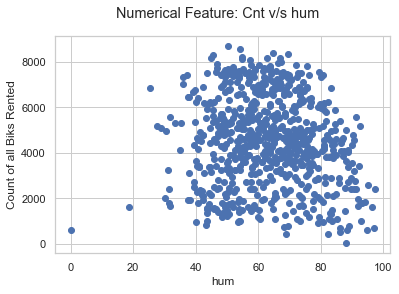

In [19]:
plt.scatter(bikes_df['hum'], bikes_df['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s hum')
plt.xlabel('hum')
plt.ylabel('Count of all Biks Rented')

#### For 'hum' or humidity looks like a big blob throught the edges so show some exiguity

#### Plot between 'windspeed' and 'cnt'

Text(0, 0.5, 'Count of all Biks Rented')

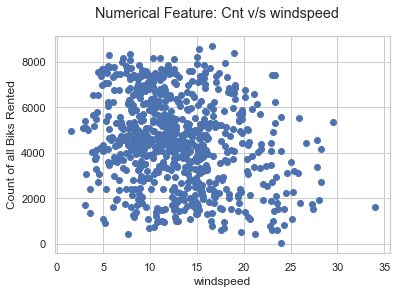

In [20]:
plt.scatter(bikes_df['windspeed'], bikes_df['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s windspeed')
plt.xlabel('windspeed')
plt.ylabel('Count of all Biks Rented')

### For  'windspeed' , it shows inverse relationship with rentals


#### For conculsion we can say too much wind and bike rentals dont seem to mix

### Now Let's make a pairplot of all the numeric variables combine 

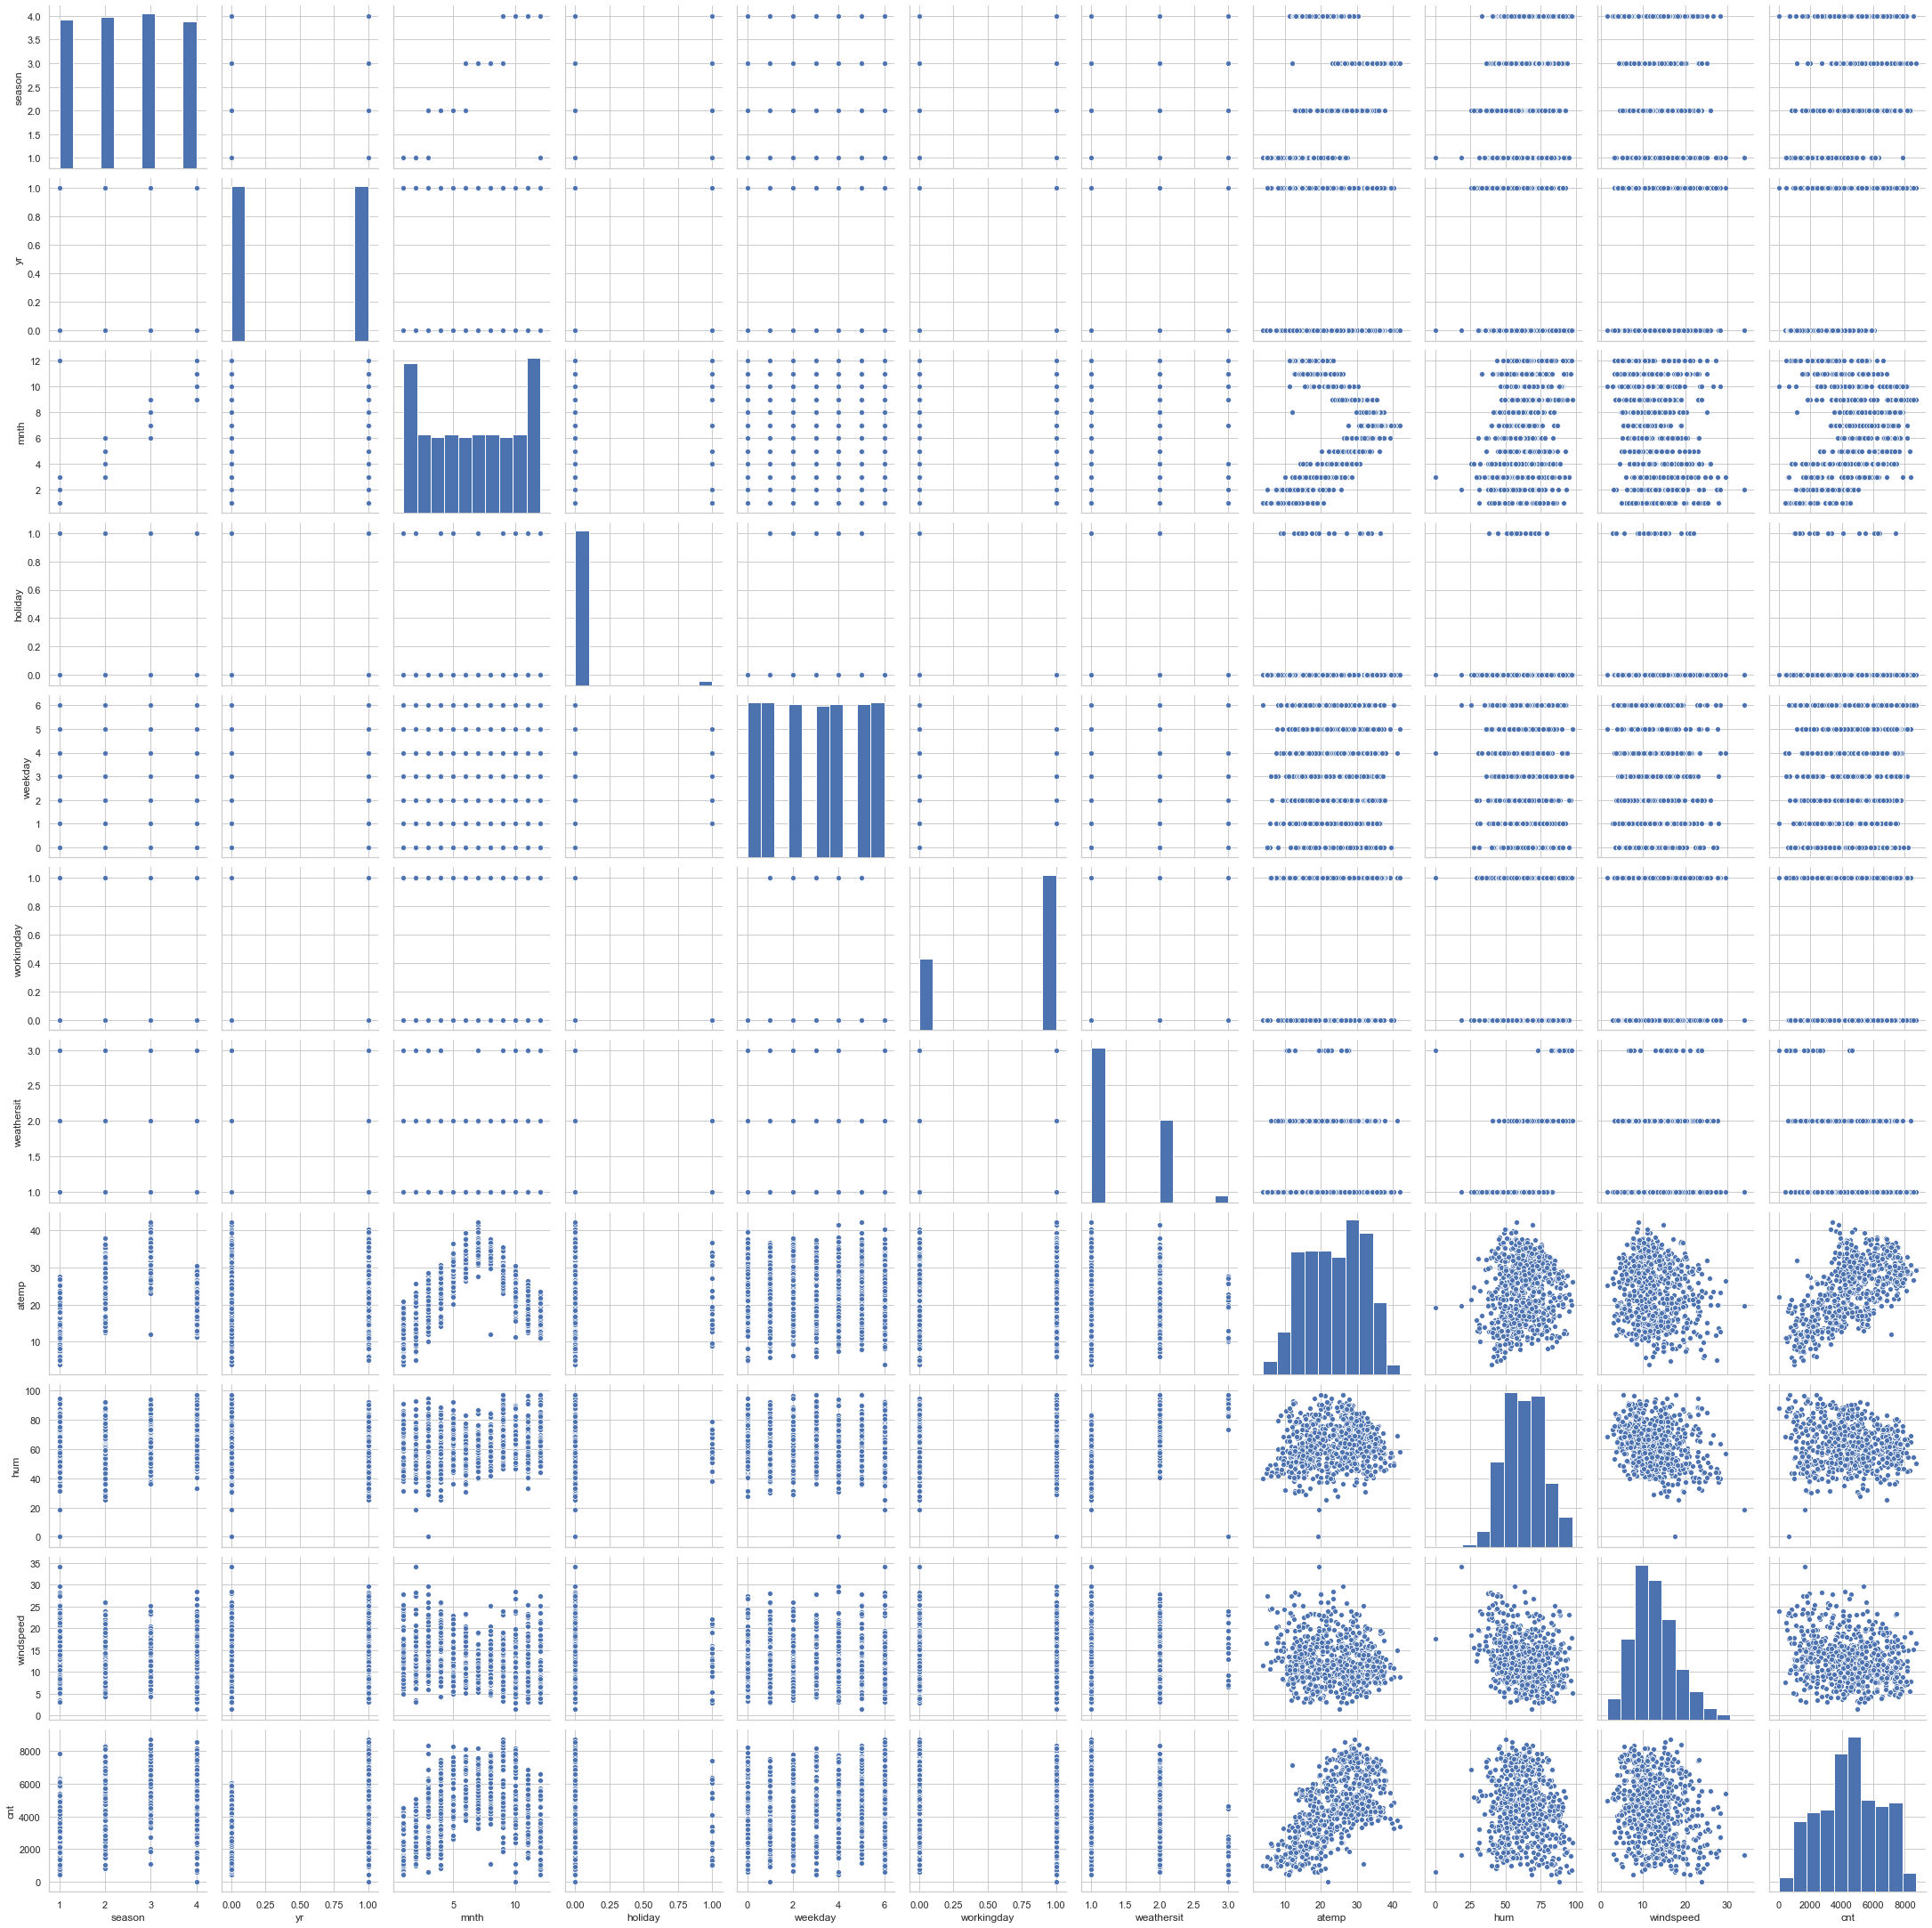

In [21]:
pairplot = sns.pairplot(bikes_df)
pairplot.fig.set_size_inches(30,30)
plt.show()

### Lets see the correlation plot among the numeric variables showing how strongly they are related to each other

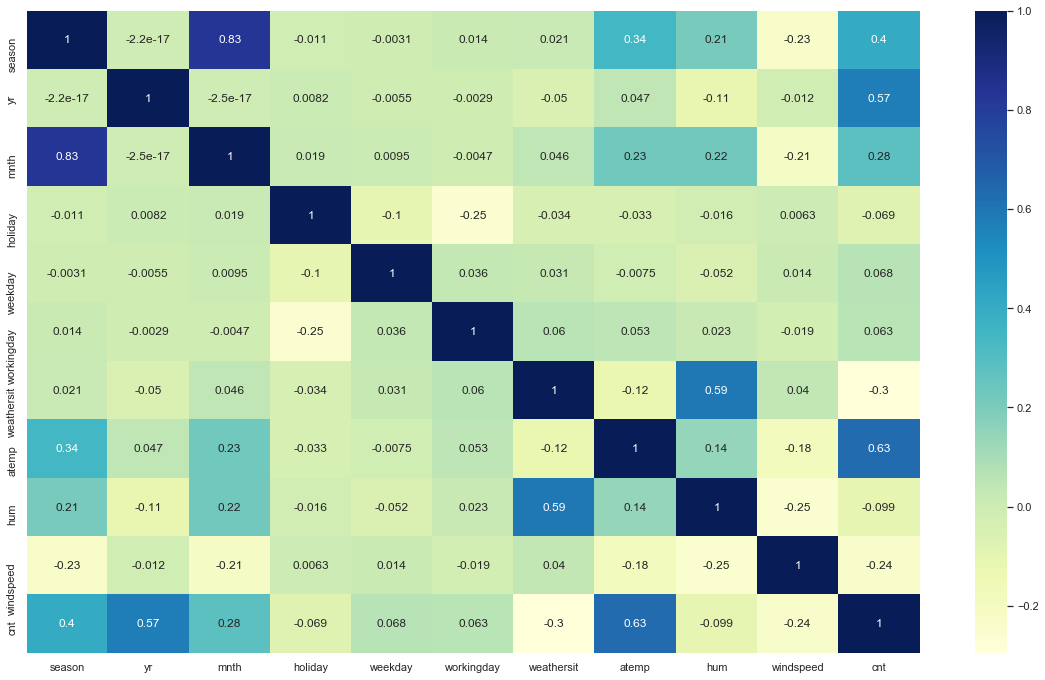

In [22]:
plt.figure(figsize = (20, 26))
plt.subplot(2, 1, 1)
sns.heatmap(bikes_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

### From the above correlation plot we see that there are some variables that are  correlated with 'cnt' while some have negative correlation values with it.


## Categorical Data
Let’s Look at Categorical Features




####  Convet variables inot categorical string variables

In [23]:
bikes_df['season'] = bikes_df['season'].apply(lambda x:pd.Series(x).map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))

In [24]:
bikes_df['weathersit'] = bikes_df['weathersit'].apply(lambda x:pd.Series(x).map({1:'Clear,Cloudy', 2:'Mist,Cloudy', 3:'Light Rain,Snow', 4:'Heavy Rain'}))

In [25]:
bikes_df['mnth'] = bikes_df['mnth'].apply(lambda x:pd.Series(x).map({1:'jan',2:'feb',3:'mar', 4:'apr',5:'may', 6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}))

In [26]:
bikes_df['weekday'] = bikes_df['weekday'].apply(lambda x:pd.Series(x).map({0:'SUNDAY',1:'MONDAY',2:'TUESDAY', 3:'WEDNSDAY',4:'THURSDAY', 5:'FRIDAY',6:'SATURDAY'}))

In [27]:
bikes_df

season  yr mnth  holiday   weekday  workingday       weathersit   atemp     hum  windspeed   cnt
0    spring   0  jan        0  SATURDAY           0      Mist,Cloudy 18.1812 80.5833    10.7499   985
1    spring   0  jan        0    SUNDAY           0      Mist,Cloudy 17.6869 69.6087    16.6521   801
2    spring   0  jan        0    MONDAY           1     Clear,Cloudy  9.4703 43.7273    16.6367  1349
3    spring   0  jan        0   TUESDAY           1     Clear,Cloudy 10.6061 59.0435    10.7398  1562
4    spring   0  jan        0  WEDNSDAY           1     Clear,Cloudy 11.4635 43.6957    12.5223  1600
5    spring   0  jan        0  THURSDAY           1     Clear,Cloudy 11.6605 51.8261     6.0009  1606
6    spring   0  jan        0    FRIDAY           1      Mist,Cloudy 10.4420 49.8696    11.3046  1510
7    spring   0  jan        0  SATURDAY           0      Mist,Cloudy  8.1127 53.5833    17.8759   959
8    spring   0  jan        0    SUNDAY           0     Clear,Cloudy  5.8087 43.4167    24.2507   822
9    spring   0  jan        0    MONDAY           1     Clear,Cloudy  7.5444 48.2917    14.9589  1321
10   spring   0  jan        0   TUESDAY           1      Mist,Cloudy  9.5732 68.6364     8.1828  1263
11   spring   0  jan        0  WEDNSDAY           1     Clear,Cloudy  8.0236 59.9545    20.4100  1162
12   spring   0  jan        0  THURSDAY           1     Clear,Cloudy  7.5442 47.0417    20.1670  1406
13   spring   0  jan        0    FRIDAY           1     Clear,Cloudy  9.4207 53.7826     8.4787  1421
14   spring   0  jan        0  SATURDAY           0      Mist,Cloudy 12.4056 49.8750    10.5835  1248
15   spring   0  jan        0    SUNDAY           0     Clear,Cloudy 11.7109 48.3750    12.6250  1204
16   spring   0  jan        1    MONDAY           0      Mist,Cloudy  8.8385 53.7500    12.9991  1000
17   spring   0  jan        0   TUESDAY           1      Mist,Cloudy 11.6166 86.1667     9.8339   683
18   spring   0  jan        0  WEDNSDAY           1      Mist,Cloudy 14.9211 74.1739    13.9572  1650
19   spring   0  jan        0  THURSDAY           1      Mist,Cloudy 12.7525 53.8333    13.1256  1927
20   spring   0  jan        0    FRIDAY           1     Clear,Cloudy  7.8917 45.7083    23.6672  1543
21   spring   0  jan        0  SATURDAY           0     Clear,Cloudy  3.9535 40.0000    11.5220   981
22   spring   0  jan        0    SUNDAY           0     Clear,Cloudy  4.9420 43.6522    16.5222   986
23   spring   0  jan        0    MONDAY           1     Clear,Cloudy  5.8965 49.1739    10.6081  1416
24   spring   0  jan        0   TUESDAY           1      Mist,Cloudy 11.7263 61.6957     8.6963  1985
25   spring   0  jan        0  WEDNSDAY           1  Light Rain,Snow 10.1800 86.2500    19.6880   506
26   spring   0  jan        0  THURSDAY           1     Clear,Cloudy 10.9850 68.7500     7.6271   431
27   spring   0  jan        0    FRIDAY           1      Mist,Cloudy 11.1659 79.3043     8.2611  1167
28   spring   0  jan        0  SATURDAY           0     Clear,Cloudy 10.6063 65.1739     9.7395  1098
29   spring   0  jan        0    SUNDAY           0     Clear,Cloudy 12.5161 72.2174     4.9568  1096
30   spring   0  jan        0    MONDAY           1      Mist,Cloudy  9.3125 60.3750    12.5419  1501
31   spring   0  feb        0   TUESDAY           1      Mist,Cloudy 11.7265 82.9565     3.5653  1360
32   spring   0  feb        0  WEDNSDAY           1      Mist,Cloudy 12.7209 77.5417    17.7086  1526
33   spring   0  feb        0  THURSDAY           1     Clear,Cloudy  8.8939 43.7826    18.6094  1550
34   spring   0  feb        0    FRIDAY           1      Mist,Cloudy 11.4293 58.5217     8.5652  1708
35   spring   0  feb        0  SATURDAY           0      Mist,Cloudy 12.1529 92.9167    10.7923  1005
36   spring   0  feb        0    SUNDAY           0     Clear,Cloudy 14.5836 56.8333     9.5006  1623
37   spring   0  feb        0    MONDAY           1     Clear,Cloudy 15.1829 73.8333     3.0424  1712
38   spring   0  feb       

###  Plotting a graph ;


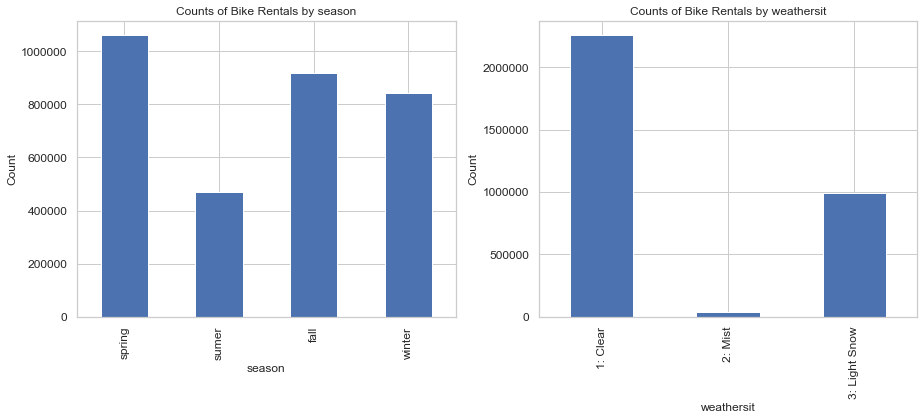

In [28]:
f,  (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

ax1 = bikes_df[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Rentals by season", 
                                         stacked=True, fontsize=12, ax=ax1)
ax1.set_xlabel("season", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xticklabels(['spring','sumer','fall','winter'])

 
ax2 = bikes_df[['weathersit','cnt']].groupby(['weathersit']).sum().reset_index().plot(kind='bar',  
      legend = False, stacked=True, title ="Counts of Bike Rentals by weathersit", fontsize=12, ax=ax2)

ax2.set_xlabel("weathersit", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.set_xticklabels(['1: Clear','2: Mist','3: Light Snow','4: Heavy Rain'])

f.tight_layout()

## Points to Note :

#### 1) The above graph of 'weathersit' shows that people tends to rent more bike in clear weather 
#### 2) and , The Season graph  show the Spring is the top season to rent bike.

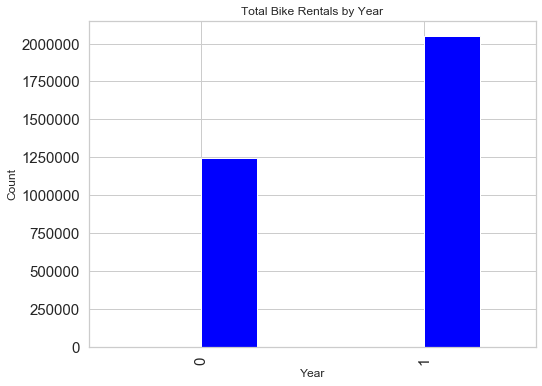

In [29]:
ax = bikes_df[['yr','cnt']].groupby(['yr']).sum().reset_index().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Total Bike Rentals by Year", 
                                       color='blue', fontsize=15)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

#### The column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively.

#### ie 2018 year = 0 and    2019 year = 1



#### It clear shows 2019 year had a high rides and was  very popular bike year as compared to year 2018 .


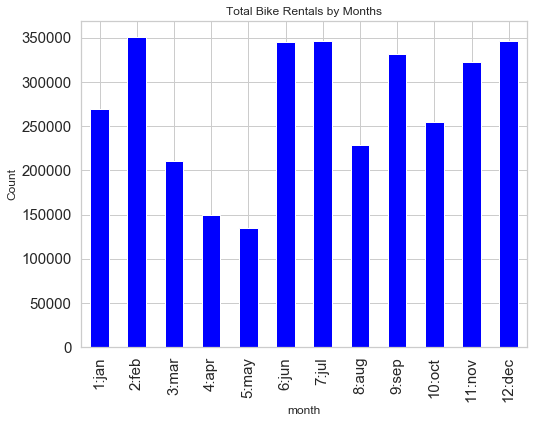

In [30]:
bx = bikes_df[['mnth','cnt']].groupby(['mnth']).sum().reset_index().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Total Bike Rentals by Months", 
                                       color='blue', fontsize=15)
bx.set_xlabel("month", fontsize=12)
bx.set_ylabel("Count", fontsize=12)
bx.set_xticklabels(['1:jan','2:feb','3:mar', '4:apr','5:may', '6:jun','7:jul','8:aug','9:sep','10:oct','11:nov','12:dec'])
plt.show()

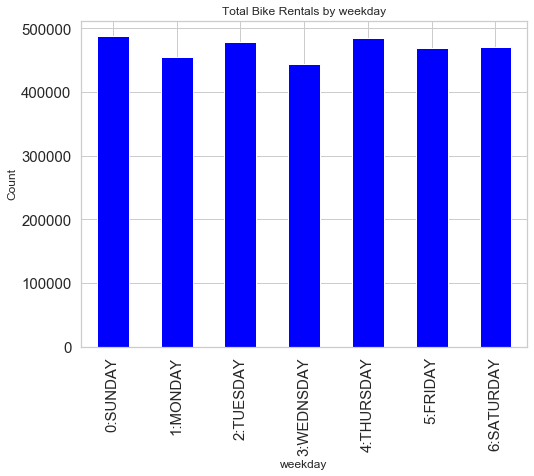

In [31]:
cx = bikes_df[['weekday','cnt']].groupby(['weekday']).sum().reset_index().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Total Bike Rentals by weekday", 
                                       color='blue', fontsize=15)
cx.set_xlabel("weekday", fontsize=12)
cx.set_ylabel("Count", fontsize=12)
cx.set_xticklabels(['0:SUNDAY','1:MONDAY','2:TUESDAY', '3:WEDNSDAY','4:THURSDAY', '5:FRIDAY','6:SATURDAY'])
plt.show()

### Now lets see how the above categorical variables relate to the 'cnt'. We will see the box plots for each against the price.



## Box Plot

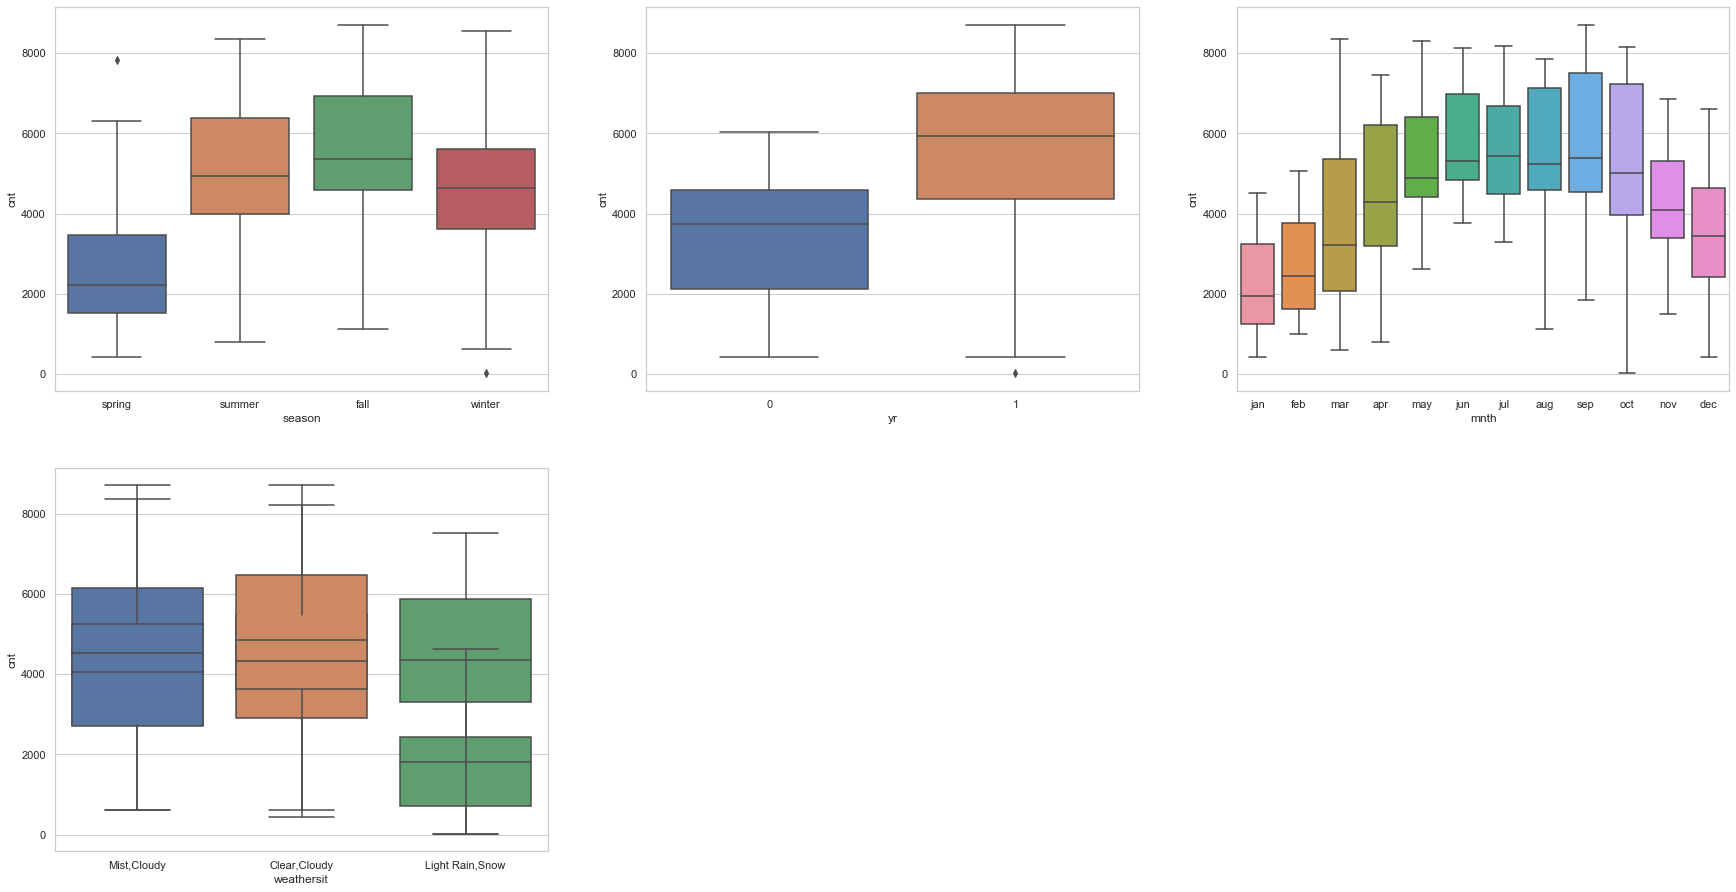

In [32]:
plt.figure(figsize=(30, 24))

plt.subplot(3,3,1)
sns.boxplot(x='season', y = 'cnt', data = bikes_df)

plt.subplot(3, 3, 2)
sns.boxplot(x='yr', y = 'cnt', data = bikes_df)

plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes_df)

plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes_df)

plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes_df)




plt.show()

# Data Preparation



#### Dealing with Categorical Variables

##### Lets see the unique values associated with the below categorical variables 
 1) season
 
 2) mnth
 
 3) weekday
 
 4) weathersit
 

In [33]:
# unique values for season
print("Unique values in season")
print(bikes_df['season'].unique())

print('\n')

# unique values for mnth
print("Unique values in month")
print(bikes_df['mnth'].unique())

print('\n')

# unique values for weekday
print("Unique values in weekday")
print(bikes_df['weekday'].unique())

print('\n')

# unique values for weathersit
print("Unique values in weathersit")
print(bikes_df['weathersit'].unique())

print('\n')

Unique values in season
['spring' 'summer' 'fall' 'winter']


Unique values in month
['jan' 'feb' 'mar' 'apr' 'may' 'jun' 'jul' 'aug' 'sep' 'oct' 'nov' 'dec']


Unique values in weekday
['SATURDAY' 'SUNDAY' 'MONDAY' 'TUESDAY' 'WEDNSDAY' 'THURSDAY' 'FRIDAY']


Unique values in weathersit
['Mist,Cloudy' 'Clear,Cloudy' 'Light Rain,Snow']




### Dummy Variables for Categorical Variables 


### FOR Month

In [34]:
mnth_new=pd.get_dummies(bikes_df['mnth'],drop_first=True)

mnth_new

aug  dec  feb  jan  jul  jun  mar  may  nov  oct  sep
0      0    0    0    1    0    0    0    0    0    0    0
1      0    0    0    1    0    0    0    0    0    0    0
2      0    0    0    1    0    0    0    0    0    0    0
3      0    0    0    1    0    0    0    0    0    0    0
4      0    0    0    1    0    0    0    0    0    0    0
5      0    0    0    1    0    0    0    0    0    0    0
6      0    0    0    1    0    0    0    0    0    0    0
7      0    0    0    1    0    0    0    0    0    0    0
8      0    0    0    1    0    0    0    0    0    0    0
9      0    0    0    1    0    0    0    0    0    0    0
10     0    0    0    1    0    0    0    0    0    0    0
11     0    0    0    1    0    0    0    0    0    0    0
12     0    0    0    1    0    0    0    0    0    0    0
13     0    0    0    1    0    0    0    0    0    0    0
14     0    0    0    1    0    0    0    0    0    0    0
15     0    0    0    1    0    0    0    0    0    0    0
16     0    0    0    1    0    0    0    0    0    0    0
17     0    0    0    1    0    0    0    0    0    0    0
18     0    0    0    1    0    0    0    0    0    0    0
19     0    0    0    1    0    0    0    0    0    0    0
20     0    0    0    1    0    0    0    0    0    0    0
21     0    0    0    1    0    0    0    0    0    0    0
22     0    0    0    1    0    0    0    0    0    0    0
23     0    0    0    1    0    0    0    0    0    0    0
24     0    0    0    1    0    0    0    0    0    0    0
25     0    0    0    1    0    0    0    0    0    0    0
26     0    0    0    1    0    0    0    0    0    0    0
27     0    0    0    1    0    0    0    0    0    0    0
28     0    0    0    1    0    0    0    0    0    0    0
29     0    0    0    1    0    0    0    0    0    0    0
30     0    0    0    1    0    0    0    0    0    0    0
31     0    0    1    0    0    0    0    0    0    0    0
32     0    0    1    0    0    0    0    0    0    0    0
33     0    0    1    0    0    0    0    0    0    0    0
34     0    0    1    0    0    0    0    0    0    0    0
35     0    0    1    0    0    0    0    0    0    0    0
36     0    0    1    0    0    0    0    0    0    0    0
37     0    0    1    0    0    0    0    0    0    0    0
38     0    0    1    0    0    0    0    0    0    0    0
39     0    0    1    0    0    0    0    0    0    0    0
40     0    0    1    0    0    0    0    0    0    0    0
41     0    0    1    0    0    0    0    0    0    0    0
42     0    0    1    0    0    0    0    0    0    0    0
43     0    0    1    0    0    0    0    0    0    0    0
44     0    0    1    0    0    0    0    0    0    0    0
45     0    0    1    0    0    0    0    0    0    0    0
46     0    0    1    0    0    0    0    0    0    0    0
47     0    0    1    0    0    0    0    0    0    0    0
48     0    0    1    0    0    0    0    0    0    0    0
49     0    0    1    0    0    0    0    0    0    0    0
50     0    0    1    0    0    0    0    0    0    0    0
51     0    0    1    0    0    0    0    0    0    0    0
52     0    0    1    0    0    0    0    0    0    0    0
53     0    0    1    0    0    0    0    0    0    0    0
54     0    0    1    0    0    0    0    0    0    0    0
55     0    0    1    0    0    0    0    0    0    0    0
56     0    0    1    0    0    0    0    0    0    0    0
57     0    0    1    0    0    0    0    0    0    0    0
58     0    0    1    0    0    0    0    0    0    0    0
59     0    0    0    0    0    0    1    0    0    0    0
60     0    0    0    0    0    0    1    0    0    0    0
61     0    0    0    0    0    0    1    0    0    0    0
62     0    0    0    0    0    0    1    0    0    0    0
63     0    0    0    0    0    0    1    0    0    0    0
64     0    0    0    0    0    0    1    0    0    0    0
65     0    0    0    0    0    0    1    0    0    0    0
66     0    0    0    0    0    0    1    0    0    

## For Weathersit

In [35]:
weathersit_new = pd.get_dummies(bikes_df['weathersit'],drop_first=True)

                                             
weathersit_new.head()

Light Rain,Snow  Mist,Cloudy
0                0            1
1                0            1
2                0            0
3                0            0
4                0            0

## For Season

In [36]:
season_new = pd.get_dummies(bikes_df['season'],drop_first=True)

season_new.head()

spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0

## For Weakday

In [37]:
weekday_new = pd.get_dummies(bikes_df['weekday'],drop_first=True)

weekday_new.head()

MONDAY  SATURDAY  SUNDAY  THURSDAY  TUESDAY  WEDNSDAY
0       0         1       0         0        0         0
1       0         0       1         0        0         0
2       1         0       0         0        0         0
3       0         0       0         0        1         0
4       0         0       0         0        0         1

#### Concat new columns to original dataframe

In [38]:
bikes=pd.concat([bikes_df, mnth_new , weekday_new , season_new , weathersit_new ], axis=1)
bikes

season  yr mnth  holiday   weekday  workingday       weathersit   atemp     hum  windspeed   cnt  aug  dec  feb  jan  jul  jun  mar  may  nov  oct  sep  MONDAY  SATURDAY  SUNDAY  THURSDAY  TUESDAY  WEDNSDAY  spring  summer  winter  Light Rain,Snow  Mist,Cloudy
0    spring   0  jan        0  SATURDAY           0      Mist,Cloudy 18.1812 80.5833    10.7499   985    0    0    0    1    0    0    0    0    0    0    0       0         1       0         0        0         0       1       0       0                0            1
1    spring   0  jan        0    SUNDAY           0      Mist,Cloudy 17.6869 69.6087    16.6521   801    0    0    0    1    0    0    0    0    0    0    0       0         0       1         0        0         0       1       0       0                0            1
2    spring   0  jan        0    MONDAY           1     Clear,Cloudy  9.4703 43.7273    16.6367  1349    0    0    0    1    0    0    0    0    0    0    0       1         0       0         0        0         0       1       0       0                0            0
3    spring   0  jan        0   TUESDAY           1     Clear,Cloudy 10.6061 59.0435    10.7398  1562    0    0    0    1    0    0    0    0    0    0    0       0         0       0         0        1         0       1       0       0                0            0
4    spring   0  jan        0  WEDNSDAY           1     Clear,Cloudy 11.4635 43.6957    12.5223  1600    0    0    0    1    0    0    0    0    0    0    0       0         0       0         0        0         1       1       0       0                0            0
5    spring   0  jan        0  THURSDAY           1     Clear,Cloudy 11.6605 51.8261     6.0009  1606    0    0    0    1    0    0    0    0    0    0    0       0         0       0         1        0         0       1       0       0                0            0
6    spring   0  jan        0    FRIDAY           1      Mist,Cloudy 10.4420 49.8696    11.3046  1510    0    0    0    1    0    0    0    0    0    0    0       0         0       0         0        0         0       1       0       0                0            1
7    spring   0  jan        0  SATURDAY           0      Mist,Cloudy  8.1127 53.5833    17.8759   959    0    0    0    1    0    0    0    0    0    0    0       0         1       0         0        0         0       1       0       0                0            1
8    spring   0  jan        0    SUNDAY           0     Clear,Cloudy  5.8087 43.4167    24.2507   822    0    0    0    1    0    0    0    0    0    0    0       0         0       1         0        0         0       1       0       0                0            0
9    spring   0  jan        0    MONDAY           1     Clear,Cloudy  7.5444 48.2917    14.9589  1321    0    0    0    1    0    0    0    0    0    0    0       1         0       0         0        0         0       1       0       0                0            0
10   spring   0  jan        0   TUESDAY           1      Mist,Cloudy  9.5732 68.6364     8.1828  1263    0    0    0    1    0    0    0    0    0    0    0       0         0       0         0        1         0       1       0       0                0            1
11   spring   0  jan        0  WEDNSDAY           1     Clear,Cloudy  8.0236 59.9545    20.4100  1162    0    0    0    1    0    0    0    0    0    0    0       0         0       0         0        0         1       1       0       0                0            0
12   spring   0  jan        0  THURSDAY           1     Clear,Cloudy  7.5442 47.0417    20.1670  1406    0    0    0    1    0    0    0    0    0    0    0       0         0       0         1        0         0       1       0       0                0            0
13   spring   0  jan        0    FRIDAY           1     Clear,Cloudy  9.4207 53.7826     8.4787  1421    0    0    0    1    0    0    0    0    0    0    0       0         0       0         0        0         0       1       0       0                0            0
14   spring   0

## Drop the Columns

In [39]:
bikes_df= bikes.drop(['season','mnth','weekday', 'weathersit' ], axis = 1)

In [40]:
bikes_df

yr  holiday  workingday   atemp     hum  windspeed   cnt  aug  dec  feb  jan  jul  jun  mar  may  nov  oct  sep  MONDAY  SATURDAY  SUNDAY  THURSDAY  TUESDAY  WEDNSDAY  spring  summer  winter  Light Rain,Snow  Mist,Cloudy
0     0        0           0 18.1812 80.5833    10.7499   985    0    0    0    1    0    0    0    0    0    0    0       0         1       0         0        0         0       1       0       0                0            1
1     0        0           0 17.6869 69.6087    16.6521   801    0    0    0    1    0    0    0    0    0    0    0       0         0       1         0        0         0       1       0       0                0            1
2     0        0           1  9.4703 43.7273    16.6367  1349    0    0    0    1    0    0    0    0    0    0    0       1         0       0         0        0         0       1       0       0                0            0
3     0        0           1 10.6061 59.0435    10.7398  1562    0    0    0    1    0    0    0    0    0    0    0       0         0       0         0        1         0       1       0       0                0            0
4     0        0           1 11.4635 43.6957    12.5223  1600    0    0    0    1    0    0    0    0    0    0    0       0         0       0         0        0         1       1       0       0                0            0
5     0        0           1 11.6605 51.8261     6.0009  1606    0    0    0    1    0    0    0    0    0    0    0       0         0       0         1        0         0       1       0       0                0            0
6     0        0           1 10.4420 49.8696    11.3046  1510    0    0    0    1    0    0    0    0    0    0    0       0         0       0         0        0         0       1       0       0                0            1
7     0        0           0  8.1127 53.5833    17.8759   959    0    0    0    1    0    0    0    0    0    0    0       0         1       0         0        0         0       1       0       0                0            1
8     0        0           0  5.8087 43.4167    24.2507   822    0    0    0    1    0    0    0    0    0    0    0       0         0       1         0        0         0       1       0       0                0            0
9     0        0           1  7.5444 48.2917    14.9589  1321    0    0    0    1    0    0    0    0    0    0    0       1         0       0         0        0         0       1       0       0                0            0
10    0        0           1  9.5732 68.6364     8.1828  1263    0    0    0    1    0    0    0    0    0    0    0       0         0       0         0        1         0       1       0       0                0            1
11    0        0           1  8.0236 59.9545    20.4100  1162    0    0    0    1    0    0    0    0    0    0    0       0         0       0         0        0         1       1       0       0                0            0
12    0        0           1  7.5442 47.0417    20.1670  1406    0    0    0    1    0    0    0    0    0    0    0       0         0       0         1        0         0       1       0       0                0            0
13    0        0           1  9.4207 53.7826     8.4787  1421    0    0    0    1    0    0    0    0    0    0    0       0         0       0         0        0         0       1       0       0                0            0
14    0        0           0 12.4056 49.8750    10.5835  1248    0    0    0    1    0    0    0    0    0    0    0       0         1       0         0        0         0       1       0       0                0            1
15    0        0           0 11.7109 48.3750    12.6250  1204    0    0    0    1    0    0    0    0    0    0    0       0         0       1         0        0         0       1       0       0                0            0
16    0        1           0  8.8385 53.7500    12.9991  1000    0    0    0    1    0    0    0    0    0    0    0       1         0       0         0        0  

## Linear model
User Defined Functions
1. applyStatsModel   -     Applies the StatsModel to the given data.
2. calculateVIF      -     Calculates the VIF for a given model.

In [41]:
# Purpose     :    Applies stats model to the given data & returns the built 'linear_model'.
# Parameters  :    data - the dataset on which the linear model has to be built on.
# Returns     :    linear_model - the model that has been built on the data provided. 


def applyStatsModel(data):
    # Adding a constant variable 
    X_train_linear_model = sm.add_constant(data)
    
    # Run the linear model
    linear_model = sm.OLS(y_train, X_train_linear_model).fit() 
    
    return linear_model



# Purpose     :    Calculates the Variance inflation factor for the given data on which stats model has been applied.
# Parameters  :    data - the dataset for which the VIF values have to be calculated.
# Returns     :    vif - the vif values for the variables on the model's data.

def calculateVIF(data):
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    
    # Calculate the vif factors for all the features.
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

#### By using np.random.seed train and test data set always have the same rows, respectively


In [42]:
np.random.seed(0)

#### We will divide the data into 70/30 % to train and test data respectively.


## Splitting the Data into Training and Testing Sets

In [43]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bikes_df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [45]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp','hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

yr  holiday  workingday  atemp    hum  windspeed    cnt  aug  dec  feb  jan  jul  jun  mar  may  nov  oct  sep  MONDAY  SATURDAY  SUNDAY  THURSDAY  TUESDAY  WEDNSDAY  spring  summer  winter  Light Rain,Snow  Mist,Cloudy
653   1        0           1 0.5011 0.5754     0.3008 0.8642    0    0    0    0    0    0    0    0    0    1    0       0         0       0         0        1         0       0       0       1                0            0
576   1        0           1 0.7664 0.7256     0.2647 0.8277    0    0    0    0    1    0    0    0    0    0    0       0         0       0         0        1         0       0       0       0                0            0
426   1        0           0 0.4390 0.6402     0.2553 0.4653    0    0    0    0    0    0    1    0    0    0    0       0         1       0         0        0         0       1       0       0                0            1
728   1        0           0 0.2003 0.4981     0.6631 0.2041    0    1    0    0    0    0    0    0    0    0    0       0         0       1         0        0         0       1       0       0                0            0
482   1        0           0 0.3917 0.5045     0.1885 0.4830    0    0    0    0    0    0    0    0    0    0    0       0         1       0         0        0         0       0       1       0                0            1

### Dividing into X and Y sets for the model building

In [46]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [47]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [48]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [49]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 12),
 ('dec', False, 8),
 ('feb', False, 9),
 ('jan', False, 6),
 ('jul', False, 2),
 ('jun', False, 13),
 ('mar', False, 19),
 ('may', False, 10),
 ('nov', False, 7),
 ('oct', False, 18),
 ('sep', False, 4),
 ('MONDAY', False, 14),
 ('SATURDAY', True, 1),
 ('SUNDAY', True, 1),
 ('THURSDAY', False, 16),
 ('TUESDAY', False, 15),
 ('WEDNSDAY', False, 17),
 ('spring', True, 1),
 ('summer', False, 11),
 ('winter', False, 5),
 ('Light Rain,Snow', True, 1),
 ('Mist,Cloudy', False, 3)]

In [50]:
columns = X_train.columns[rfe.support_]
columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'SATURDAY',
       'SUNDAY', 'spring', 'Light Rain,Snow'],
      dtype='object')

In [51]:
X_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sep', 'MONDAY', 'THURSDAY', 'TUESDAY', 'WEDNSDAY', 'summer', 'winter',
       'Mist,Cloudy'],
      dtype='object')

In [52]:
X_train = X_train.drop(['aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct','sep','MONDAY', 'THURSDAY','WEDNSDAY' , 'TUESDAY', ], axis=1)

### Building model using statsmodel, for the detailed statistics

#### MODEL 1

In [53]:
# Lets now create a data set only with RFE supported columns.
X_train_1 = X_train

# Run the linear model
stats_model_1 = applyStatsModel(X_train_1)

#Let's see the summary of the linear model built above
print(stats_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     201.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.97e-182
Time:                        14:50:15   Log-Likelihood:                 489.39
No. Observations:                 510   AIC:                            -952.8
Df Residuals:                     497   BIC:                            -897.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2239      0.028     

In [54]:
vif_val_1 = calculateVIF(X_train_1)

vif_val_1

Features     VIF
2        workingday 48.0300
6          SATURDAY 11.5700
7            SUNDAY 11.2100
8            spring  4.1600
3             atemp  3.2400
10           winter  2.8100
1           holiday  2.7800
9            summer  1.9400
4               hum  1.8800
12      Mist,Cloudy  1.5700
11  Light Rain,Snow  1.2500
5         windspeed  1.2000
0                yr  1.0300

#### Looking at the statistics of model 1, we observe that variable - workingday , has a high p-value and vif value and thus is insignificant to our model. Let's go ahead and drop it & build a new model with the remaining variables.


### Model 2

In [55]:
X_train_2 = X_train_1.drop(["workingday"], axis = 1)

# Run the linear model
stats_model_2 = applyStatsModel(X_train_2)

#Let's see the summary of the new linear model
print(stats_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     201.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.97e-182
Time:                        14:50:19   Log-Likelihood:                 489.39
No. Observations:                 510   AIC:                            -952.8
Df Residuals:                     497   BIC:                            -897.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3117      0.035     

In [56]:
# Calculate the VIFs again for the new model
vif_val_2 = calculateVIF(X_train_2)

# Let's see the vif values
vif_val_2

Features     VIF
3               hum 26.7900
2             atemp 14.4800
4         windspeed  4.5200
7            spring  3.5300
9            winter  2.8800
11      Mist,Cloudy  2.2900
8            summer  2.1700
0                yr  2.0700
10  Light Rain,Snow  1.2500
5          SATURDAY  1.2300
6            SUNDAY  1.2200
1           holiday  1.0500

#### Drop variable SATURDAY as it has high p-value

## MODEL3

In [57]:
X_train_3 = X_train_2.drop(["SATURDAY"], axis = 1)

# Run the linear model
stats_model_3 = applyStatsModel(X_train_3)

#Let's see the summary of the new linear model
print(stats_model_3.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.49e-183
Time:                        14:50:23   Log-Likelihood:                 489.06
No. Observations:                 510   AIC:                            -954.1
Df Residuals:                     498   BIC:                            -903.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3142      0.035     

In [58]:
# Calculate the VIFs again for the new model
vif_val_3 = calculateVIF(X_train_3)

# Let's see the vif values
vif_val_3

Features     VIF
3               hum 26.7900
2             atemp 14.4400
4         windspeed  4.4900
6            spring  3.5100
8            winter  2.8700
10      Mist,Cloudy  2.2900
7            summer  2.1700
0                yr  2.0700
9   Light Rain,Snow  1.2500
5            SUNDAY  1.1900
1           holiday  1.0400

#### As by looking at the Model3 stats , we can see that variable 'hum' has high VIF-value so we will drop this 






#### From the stats model summary of above model 3 , we see that all the high  p-values  are removed and  now in the allowed range. Now We will look into the VIF table now. From the VIF table above we see that 'hum' has a very high vif value. Lets drop it and re-bilud our model.

##  MODEL 4

In [59]:
X_train_4 = X_train_3.drop(["hum"], axis = 1)

# Run the linear model
X_train_linear_model = sm.add_constant(X_train_4)
linear_model = sm.OLS(y_train, X_train_linear_model).fit() 

#Let's see the summary of the new linear model
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          5.45e-182
Time:                        14:50:29   Log-Likelihood:                 483.66
No. Observations:                 510   AIC:                            -945.3
Df Residuals:                     499   BIC:                            -898.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2499      0.029     

In [60]:
# Calculate the VIFs again for the new model
vif_val_4 = calculateVIF(X_train_4)

# Let's see the vif values
vif_val_4

Features    VIF
3        windspeed 4.4800
2            atemp 3.5900
0               yr 2.0600
5           spring 1.9600
6           summer 1.8000
7           winter 1.6400
9      Mist,Cloudy 1.5300
4           SUNDAY 1.1800
8  Light Rain,Snow 1.0800
1          holiday 1.0400

### This seems to be fit model as all the p-value and VIF value are in range and the variable is less than 10 
#### So this our final model

In [61]:
X_train_new=X_train_4.columns
X_train_new

Index(['yr', 'holiday', 'atemp', 'windspeed', 'SUNDAY', 'spring', 'summer',
       'winter', 'Light Rain,Snow', 'Mist,Cloudy'],
      dtype='object')

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [62]:
X_train_linear_model.columns

Index(['const', 'yr', 'holiday', 'atemp', 'windspeed', 'SUNDAY', 'spring',
       'summer', 'winter', 'Light Rain,Snow', 'Mist,Cloudy'],
      dtype='object')

In [63]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
y_train_cnt = linear_model.predict(X_train_linear_model)

Text(0.5, 0, 'Errors')

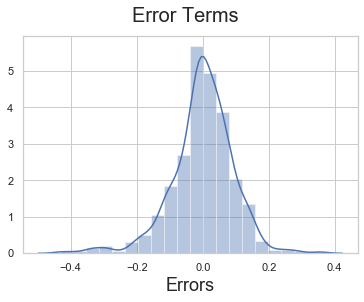

In [65]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

#### Applying the scaling on the test sets

In [66]:
num_vars = ['atemp','hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [67]:
y_test = df_test.pop('cnt')
X_test = df_test

In [70]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_4.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)



In [73]:
y_pred = linear_model.predict(X_test_new)

Text(0, 0.5, 'y_pred')

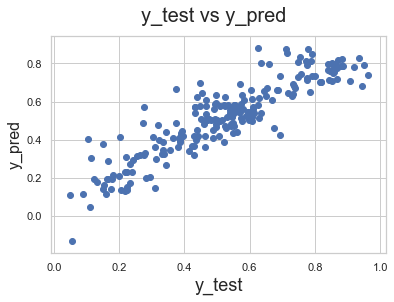

In [74]:
#Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## Conclusion

From the final model we have all our variables in the permissible limits and the model looks to be stable. The error terms are also normally distributed. Overall the model looks good.

Our deciding factors would be -
0  yr
1	holiday	
2	atemp
3	windspeed	
4	SUNDAY
5   SPRING
6   summer
7   winter
8   Light Rain,Snow
9   Mist,Cloudy


The final equation of the for our best fitted line for predicting price would be -

cnt = (0.2352 x yr) + (-0.0932 x holiday) + (0.4639 x atemp) + (-0.1374 x windspeed) + (-0.0515 x sunday)+ (0.0235x summer)   +(0.0587xwinter)+(-0.2814 x light Rain, Snow)+(-0.0792 x Mist,Cloudy )+ 0.2499